In [1]:
from knowknow import *
kk = KnowKnow( NB_DIR=_dh[0], BASEDIR=_dh[0] )
cnt = kk.get_cnt("sociology-wos", 'doc', ['ty','ta','c','fa.c','c.fy','c1.c2'])

Loaded keys: dict_keys(['ty', 'ta', 'c', 'fa.c', 'c.fy', 'c1.c2'])
Available keys: []


In [2]:
most_c = Counter(cnt['ta']).most_common(50)

for x,c in most_c:
    print(x.ta,c)

Bourdieu, P. 5381
Goffman, E. 3836
Coleman, J. 3402
Weber, M. 3402
Giddens, A. 3350
Blau, P. 3147
Foucault, M. 3008
Durkheim, E. 2834
Parsons, T. 2667
Becker, G. 2270
Berger, P. 2243
Becker, H. 2149
Granovetter, M. 2146
Putnam, R. 2122
Portes, A. 2061
Massey, D. 2007
Dimaggio, P. 1850
Van, D. 1712
Hochschild, A. 1677
Duncan, O. 1646
Wilson, W. 1644
Glaser, B. 1639
Habermas, J. 1622
Sampson, R. 1556
Tilly, C. 1456
Blumer, H. 1417
Mills, C. 1392
Beck, U. 1390
Collins, R. 1380
Sewell, W. 1371
Strauss, A. 1362
Garfinkel, H. 1329
Stark, R. 1321
Merton, R. 1311
Lipset, S. 1306
Mead, G. 1289
Simmel, G. 1270
Diener, E. 1266
Connell, R. 1255
Williams, R. 1232
Blalock, H. 1203
Scott, J. 1194
Gouldner, A. 1184
Wuthnow, R. 1168
Mcadam, D. 1168
Meyer, J. 1160
Snow, D. 1160
Homans, G. 1158
Burt, R. 1157
Latour, B. 1152


In [3]:
from random import choice
to_examine = choice(most_c)

In [4]:
print(to_examine)

(ta(ta='Becker, H.'), 2149)


In [5]:
to_examine = to_examine[0].ta

In [6]:
my_cits = [x for x in cnt['c'] if x.c.split("|")[0] == to_examine]

In [7]:
my_cits

[c(c='Becker, H.|boys white'),
 c(c='Becker, H.|art worlds'),
 c(c='Becker, H.|1953|am j sociol,v59,p235'),
 c(c='Becker, H.|1967|soc probl,v14,p239'),
 c(c='Becker, H.|outsiders'),
 c(c='Becker, H.|1986|doing things togethe'),
 c(c='Becker, H.|1960|am j sociol,v66,p32'),
 c(c='Becker, H.|what is case explori'),
 c(c='Becker, H.|tricks trade think y'),
 c(c='Becker, H.|1978|am j sociol,v83,p862'),
 c(c='Becker, H.|1957|hum organ,v16,p28'),
 c(c='Becker, H.|qualitative inquiry'),
 c(c='Becker, H.|music scenes local t'),
 c(c='Becker, H.|1974|studies anthr visual,v1,p3'),
 c(c='Becker, H.|telling soc'),
 c(c='Becker, H.|1974|am sociol rev,v39,p767'),
 c(c='Becker, H.|1951|am j sociol,v57,p136'),
 c(c='Becker, H.|1958|am sociol rev,v23,p652'),
 c(c='Becker, H.|values social interp'),
 c(c='Becker, H.|making grade'),
 c(c='Becker, H.|1956|am j sociol,v62,p253'),
 c(c='Becker, H.|human org res field'),
 c(c='Becker, H.|image based res sour'),
 c(c='Becker, H.|1964|sociometry,v27,p40'),
 c(c

Text(0.5, 1.0, 'Works cited with Becker, H.')

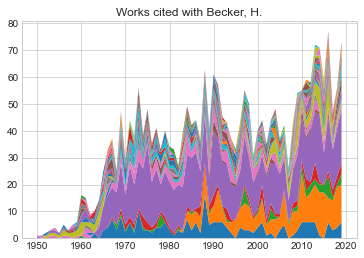

In [8]:
yr_plts = [
    [ cnt['c.fy'][(x.c,YY)] for YY in range(1950,2020) ]
    for x in my_cits
]

plt.stackplot(range(1950,2020),*yr_plts, labels=range(len(my_cits)));
plt.title("Works cited with %s" % to_examine)
#plt.legend();

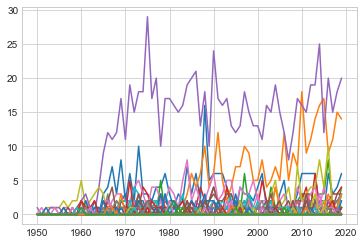

In [9]:
yr_plts = [
    [ cnt['c.fy'][(x.c,YY)] for YY in range(1950,2020) ]
    for x in my_cits
]

for yrplt in yr_plts:
    plt.plot(range(1950,2020),yrplt);
#plt.legend();

In [10]:
list(cnt['c1.c2'].keys())[0]

c1_c2(c1='Lash, S.|ec signs spaces', c2='Putnam, R.|making democracy wor')

In [11]:
cocits = [x for x in cnt['c1.c2'] if cnt['c1.c2'][x]>0 and x.c1.split("|")[0] == to_examine]

In [12]:
cocits = sorted(cocits, key=lambda x:-cnt['c1.c2'][x])
#cocits = [x.c2 for x in cocits]

In [13]:
cocits[:10]

[c1_c2(c1='Becker, H.|outsiders', c2='Goffman, I.|stigma notes managem'),
 c1_c2(c1='Becker, H.|outsiders', c2='Lemert, E.|social pathology'),
 c1_c2(c1='Becker, H.|outsiders', c2='Goffman, E.|asylums'),
 c1_c2(c1='Becker, H.|outsiders', c2='Lemert, E.|human deviance socia'),
 c1_c2(c1='Becker, H.|art worlds', c2='Bourdieu, P.|distinction a social'),
 c1_c2(c1='Becker, H.|outsiders', c2='Blumer, H.|symbolic interaction'),
 c1_c2(c1='Becker, H.|outsiders', c2='Mead, G.|mind self and societ'),
 c1_c2(c1='Becker, H.|art worlds', c2='Bourdieu, P.|field cultural produ'),
 c1_c2(c1='Becker, H.|outsiders', c2='Schur, E.|labeling deviant beh'),
 c1_c2(c1='Becker, H.|outsiders', c2='Cohen, A.|delinquent boys cult')]

In [14]:
cauths = defaultdict(int)
for x in cnt['c1.c2']:
    if cnt['c1.c2'][x]>0 and x.c1.split("|")[0] == to_examine:
        cauths[x.c2.split("|")[0]] +=  cnt['c1.c2'][x]


In [15]:
# make some sort of word cloud with this data
# these are the authors most often cited with this author
Counter(cauths).most_common()

[('Bourdieu, P.', 679),
 ('Goffman, E.', 622),
 ('Lemert, E.', 356),
 ('Goffman, I.', 267),
 ('Durkheim, E.', 210),
 ('Mead, G.', 202),
 ('Garfinkel, H.', 201),
 ('Blumer, H.', 199),
 ('Dimaggio, P.', 194),
 ('Foucault, M.', 187),
 ('Hughes, E.', 182),
 ('Matza, D.', 180),
 ('Glaser, B.', 169),
 ('Berger, P.', 165),
 ('Weber, M.', 154),
 ('Parsons, T.', 153),
 ('Giddens, A.', 138),
 ('Erikson, K.', 107),
 ('Strauss, A.', 106),
 ('Schur, E.', 106),
 ('Gusfield, J.', 105),
 ('Cohen, A.', 101),
 ('Sykes, G.', 100),
 ('Becker, H.', 100),
 ('Freidson, E.', 95),
 ('Cloward, R.', 95),
 ('Hirschi, T.', 94),
 ('Simmel, G.', 92),
 ('Latour, B.', 87),
 ('Swidler, A.', 81),
 ('Hochschild, A.', 80),
 ('Lamont, M.', 79),
 ('Blau, P.', 76),
 ('Granovetter, M.', 72),
 ('Spector, M.', 70),
 ('Coleman, J.', 68),
 ('White, W.', 67),
 ('Cohen, S.', 67),
 ('Gouldner, A.', 64),
 ('Scott, M.', 64),
 ('Snow, D.', 63),
 ('Hebdige, D.', 58),
 ('Mills, C.', 58),
 ('Schutz, A.', 57),
 ('Merton, R.', 53),
 ('Haber

In [16]:
authors_to_network = [x[0] for x in Counter(cauths).most_common(15)]

In [17]:
gcnt = defaultdict(int)

In [18]:
for x,c in cnt['c1.c2'].items():
    a1 = x.c1.split("|")[0]
    a2 = x.c2.split("|")[0]
    if a1 in authors_to_network and a2 in authors_to_network:
        gcnt[(a1,a2)] += c
        #gcnt[(x.c2,x.c1)] += c

In [97]:
G = nx.Graph()

In [98]:
skipped = 0
counted = 0

In [110]:
cnt['ta'][(a1,)]

1850

In [99]:
for (a1,a2),c in gcnt.items():
    if c > cnt['ta'][(a1,)]*cnt['ta'][(a2,)]*0.00005:
        G.add_edge(a1,a2, weight=c)
        counted += 1
    else:
        skipped += 1

In [102]:
print(skipped,counted)

44 74


[('Bourdieu, P.', 8), ('Goffman, E.', 14), ('Dimaggio, P.', 5), ('Durkheim, E.', 12), ('Berger, P.', 8), ('Weber, M.', 7), ('Glaser, B.', 6), ('Goffman, I.', 14), ('Garfinkel, H.', 13), ('Foucault, M.', 8), ('Mead, G.', 13), ('Blumer, H.', 9), ('Matza, D.', 11), ('Lemert, E.', 10), ('Hughes, E.', 10)]


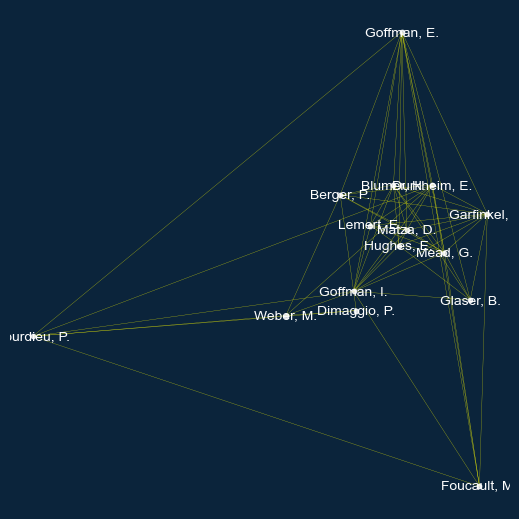

In [109]:
# I can't figure out how, but the edges should be colored / sized by their LOG(weight)

nodes = G.nodes()
degree = G.degree(weight=True)
print(degree)
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)
nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
nx.draw_networkx_labels(G,pos,font_color='w',font_size=10)
fig.set_facecolor('#0B243B')

plt.show()